<a href="https://colab.research.google.com/github/HernanMagallanes/TensorFlow_course/blob/main/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Neural Networks with TensorFlow

##Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. 

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU."

### Core concepts:

1. input, output 
2. neuron

3. hidden layer - densenly connected layer

4. weights / connections
5. bias neuron, trainable parameter

6. activation function (Relu, Tanh, sigmoid)     

7. loss/cost function  (mean squared error , mean absolute error, hinge loss)

8. gradient descent - minimize the loss

9. backpropagation - update weights and biases

10. Optimizer:
gradient descent, stochastic gradient descent, mini-batch gradient descent, momentum, nesterov accelerated gradient 

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# dataset

# 60.000 images for training
# 10.000 images for validation/testing

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# pixel value
# between 0 and 255, from black to white
# grayscale images

train_images[0, 23, 23]

194

In [ ]:
# each label represent a specific article of clothing

train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# array of label names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

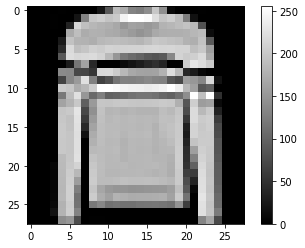

In [ ]:
plt.figure()
plt.imshow(train_images[5], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# data preprocessing
# scale all grayscale (0-255) to (0-1)
# smaller values will make ir easier for the model to process the values

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# building the model
# feed-foward neural network
# input layer, hiddern layer and putput layer

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# compile the model
# define loss function, optimizer and metrics

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the model

model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4914 - accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3713 - accuracy: 0.8658
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3387 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2948 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2695 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2579 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2465 - accuracy: 0.9089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [ ]:
# evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3299 - accuracy: 0.8832
Test accuracy: 0.8831999897956848


In [ ]:
# the model is overfitted because the accuracy of the training is bigger than the test 
# it 's not as good at generalizing for other data
# we want the highest accuracy in the new data

# for a high value of epochs the model "see" the information so much tweaking that can't generalize 

In [ ]:
# make predictions

predictions = model.predict(test_images)
predictions[0]

array([2.21313581e-08, 1.55294305e-10, 1.39669725e-11, 2.41635578e-09,
       8.95906294e-10, 1.81353447e-04, 1.27156454e-07, 5.48061868e-03,
       9.65835079e-10, 9.94337857e-01], dtype=float32)

In [ ]:
n = np.argmax(predictions[0]) 

print(n, class_names[n])

9 Ankle boot


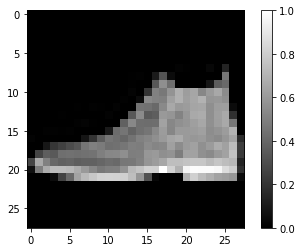

In [ ]:
plt.figure()
plt.imshow(test_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

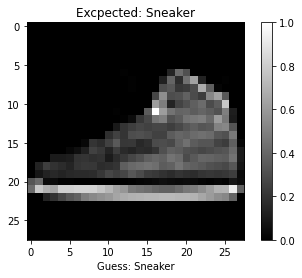

In [ ]:
# verify predictions

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


num = 45

image = test_images[num]
label = test_labels[num]
predict(model, image, label)